In [136]:
from choice_model import ChoiceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
old_model = ChoiceModel()

In [138]:
data = pd.DataFrame(columns=['series','period','PPI','CVI','DCI','NUM'])

In [139]:
series = 'true_data'
for period in range(1,10):
    old_model.roll_back(period)
    PPI,CVI,DCI = old_model.evaluate()
    num = len(list(old_model.graph.nodes))
    data .loc[len(data )] = [series,period,PPI,CVI,DCI,num]
    old_model.visualize(file_name=f"old_graph/period_{period}.html")

In [140]:
series = 'sim_data'
for period in range(1,10):
    file = f'{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    data.loc[len(data)] = ['sim_baseline',period,PPI,CVI,DCI,num]

In [141]:
series = 'remove_long_term'
for period in range(1,10):
    file = f'{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    data.loc[len(data)] = [series,period,PPI,CVI,DCI,num]

In [142]:
series = 'remove_event'
for period in range(1,10):
    file = f'{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    data.loc[len(data)] = [series,period,PPI,CVI,DCI,num]

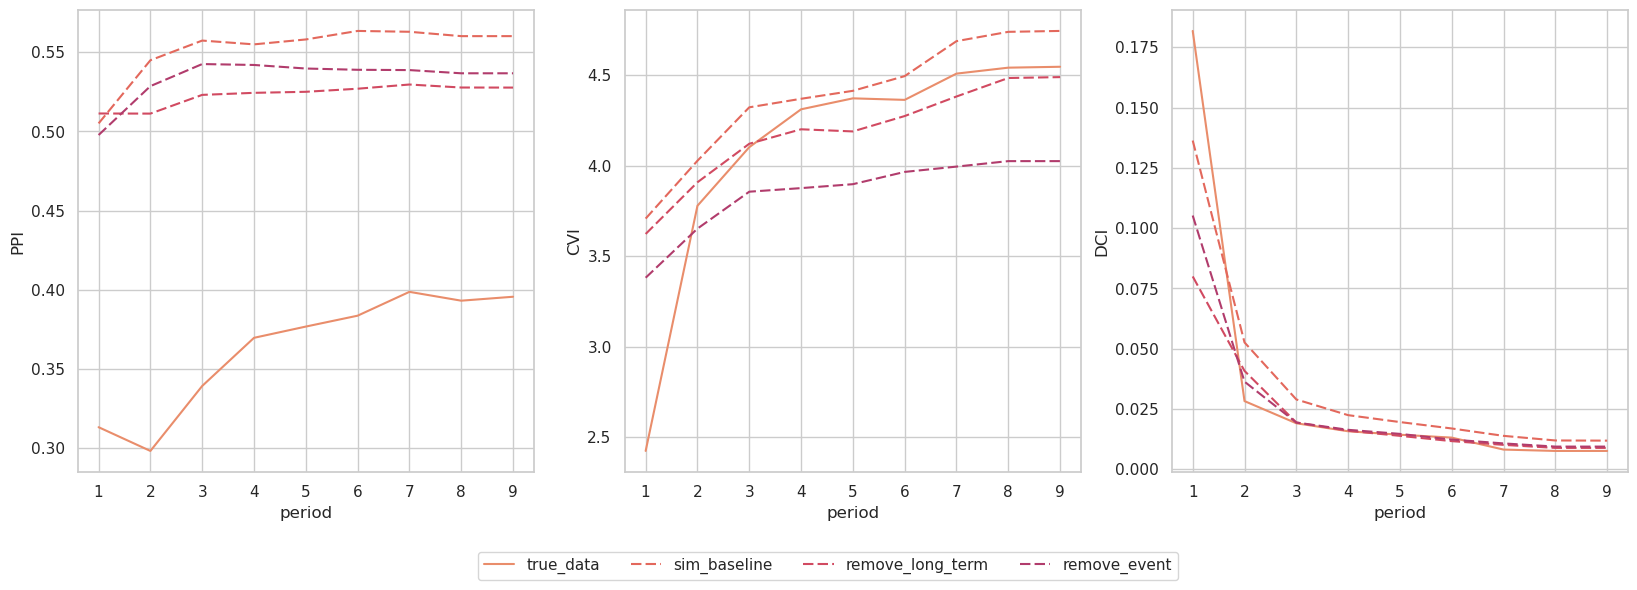

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

line_styles = {
    'sim_baseline': [5,2],
    'remove_long_term': [5,2],
    'remove_event':[5,2],
    'true_data': []
}

# Plot the data with legends enabled temporarily
line1 = sns.lineplot(data=data, x='period', y='PPI', hue='series', style='series', dashes=line_styles, ax=ax[0], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                      palette = sns.color_palette("flare")[:len(data['series'].unique())]
                    )
line2 = sns.lineplot(data=data, x='period', y='CVI', hue='series', style='series', dashes=line_styles, ax=ax[1], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                      palette = sns.color_palette("flare")[:len(data['series'].unique())]
                    )
line3 = sns.lineplot(data=data, x='period', y='DCI', hue='series', style='series', dashes=line_styles, ax=ax[2], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette = sns.color_palette("flare")[:len(data['series'].unique())]
                    )

# Get handles and labels from the first plot
handles, labels = line1.get_legend_handles_labels()

# Turn off individual legends
ax[0].legend().remove()
ax[1].legend().remove()
ax[2].legend().remove()

# Add a single legend
fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, -0.01))
fig.savefig("data1.png")
plt.show()

# Scatter Plot - Period 9

In [110]:
from choice_model import ChoiceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
model = ChoiceModel()
graph = model.graph
actors = [a for a in graph.nodes() if graph.nodes[a]['type']=='Actors']
true_data = pd.DataFrame(columns=["actor_id","age","gender","marrige",
                             "withkids","student","workstatue","residentinneighbor","","contribution","participation","series"])
for a in actors:
    contribution = graph.out_degree(a)
    participation = graph.in_degree(a)
    props = graph.nodes[a]['properties']
    age = props['age']
    gender = props['gender']
    marrige = props['marrige']
    withkids = props['withkids']
    student = props['student']
    workstatue = props['workstatue']
    residentinneighbor = props['residentinneighbor']
    educationlevel = props['educationlevel']
    true_data.loc[len(true_data)] = [a,age,gender,marrige,withkids,student,workstatue,
                           residentinneighbor,educationlevel,contribution,participation,"true_data"]

true_data["norm_contribution"] = true_data["contribution"]/true_data["contribution"].max()
true_data["norm_participation"] = true_data["participation"]/true_data["participation"].max()

In [112]:
model = ChoiceModel(graph_path="sim_data/sim_data_9.pkl")
graph = model.graph
actors = [a for a in graph.nodes() if graph.nodes[a]['type']=='Actors']
sim_data = pd.DataFrame(columns=["actor_id","age","gender","marrige",
                             "withkids","student","workstatue","residentinneighbor","","contribution","participation","series"])
for a in actors:
    contribution = graph.out_degree(a)
    participation = graph.in_degree(a)
    props = graph.nodes[a]['properties']
    age = props['age']
    gender = props['gender']
    marrige = props['marrige']
    withkids = props['withkids']
    student = props['student']
    workstatue = props['workstatue']
    residentinneighbor = props['residentinneighbor']
    educationlevel = props['educationlevel']
    sim_data.loc[len(sim_data)] = [a,age,gender,marrige,withkids,student,workstatue,
                           residentinneighbor,educationlevel,contribution,participation,"sim_baseline"]

sim_data["norm_contribution"] = sim_data["contribution"]/sim_data["contribution"].max()
sim_data["norm_participation"] = sim_data["participation"]/sim_data["participation"].max()

In [113]:
data = pd.concat([true_data,sim_data], axis=0, ignore_index=True)

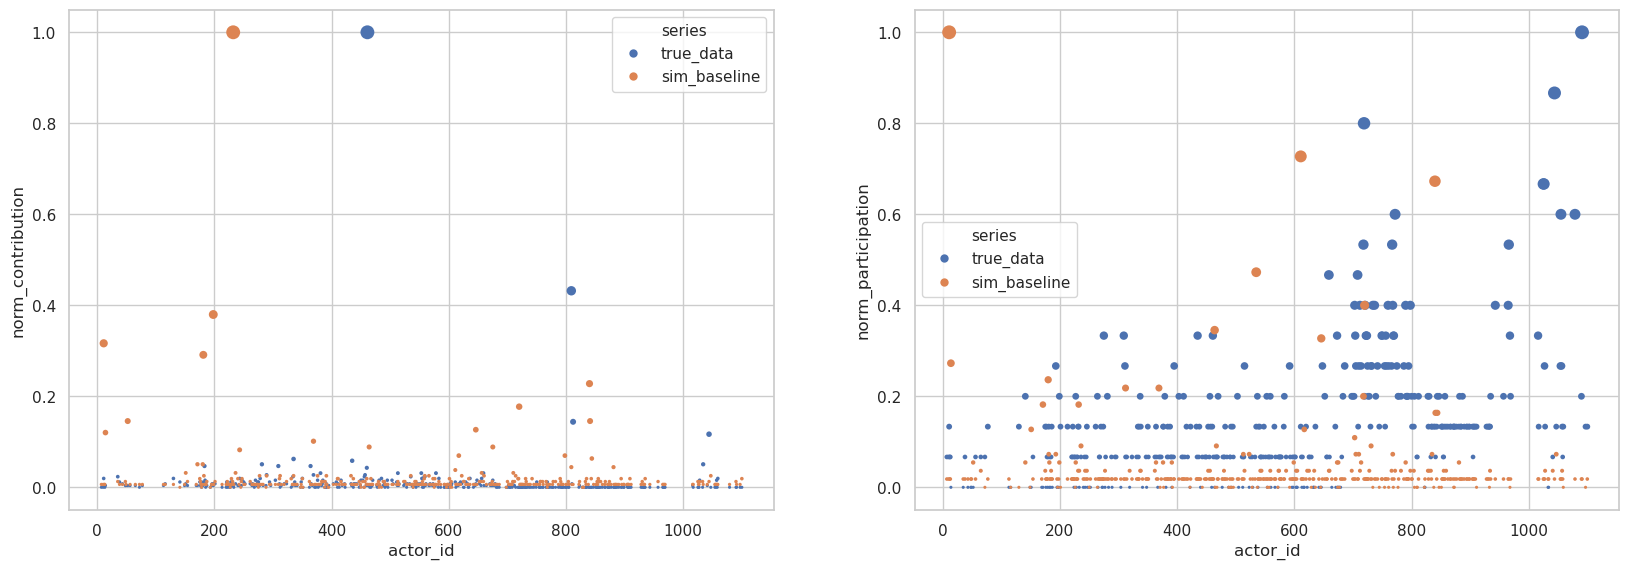

In [114]:
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6.5))
sns.set_theme(style="whitegrid")
# sns.despine(fig, left=True, bottom=True)
# Plot without size legend
scatter1 = sns.scatterplot(x="actor_id", y="norm_contribution", size="norm_contribution", hue="series",
                           sizes=(5, 100), linewidth=0, data=data, ax=ax[0])
scatter2 = sns.scatterplot(x="actor_id", y="norm_participation", size="norm_participation", hue="series",
                           sizes=(5, 100), linewidth=0, data=data, ax=ax[1])

# Get handles and labels from the first plot
handles, labels = scatter1.get_legend_handles_labels()
hue_handles = handles[:len(data['series'].unique())+1]
hue_labels = labels[:len(data['series'].unique())+1]
ax[0].legend().remove()
ax[1].legend().remove()

# Create a single legend for the series
ax[0].legend(hue_handles, hue_labels)
ax[1].legend(hue_handles, hue_labels)

# fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.show()
